## Stock Sentiment Analysis using News Headlines

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [57]:
# Read Data and Encode using ISO-8859-1
df = pd.read_csv('Data.csv', encoding='ISO-8859-1')

df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [58]:
#Seperate Training Data Vs Testing Data
train = df[df['Date']<'20140101']
test = df[df['Date']>'20140101']

test.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3723,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
3724,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps
3725,2015-01-06,0,US oil falls below $50 a barrel,"Toyota gives away 5,680 fuel cell patents to b...",Young Indian couple who had been granted polic...,A senior figure in Islamic States self-declare...,Fukushima rice passes radiation tests for 1st ...,Nearly all Spanish parties guilty of financial...,King Abdullah to abdicate Saudi Throne,Taliban Commander Caught Networking On LinkedIn,...,Thousands of Indians have fled from their home...,Turkey sacks judges who oversaw Erdogan corrup...,SpaceX Falcon 9 launch and recovery has been a...,CNN: Americans charged in botched Gambia coup,Islamic State 'Police' Official Beheaded.,Libya bans Palestinians from country to preven...,A judicial inquiry was opened in France on Mon...,Video has captured the moment a cameraman was ...,Syria has complained to the United Nations tha...,"Tests over, India set to make the iris of bigg..."
3726,2015-01-07,1,'Shots fired' at French magazine HQ,90% of Bibi Netanyahus Campaign Funds From U.S.,ISIS behead street magician for entertaining c...,Denmark sets new world record in renewable ene...,"ISIS Closes Schools In Syria, Leaving 670000 C...",The European Union wants Turkey to explain how...,10 people have died in a shooting at the headq...,Most Earth-like planet ever discovered could b...,...,Discovery of witnesss mutilated body feeds cla...,Radical Islam a growing threat to sub-Saharan ...,Tony Blair may 'face war crime charges' over I...,Benjamin Netanyahu says settlements unlikely t...,Tasmania moves to allow corporations to sue pr...,Indonesia search chief: Tail section of AirAsi...,"North Korean Defector: ""Bureau 121"" Hackers lo...",Female suicide bomber attacks police station i...,IS to turn Syria schools into religious indoct...,Ebola vaccine trials in Halifax so far a success
3727,2015-01-08,1,New Charlie Hebdo issue to come out next week:...,"Ahmed Merabet, Cop Killed In Paris Attacks, Wa...",Youngest Suspect in Charlie Hebdo Attack Turns...,"Grenades thrown at a mosque in Le Mans, west o...",Danish newspaper to print Charlie Hebdo cartoo...,M

In [59]:
# Eliminate the Date and Label Columns
data = train.iloc[:,2:27]
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [60]:
#Remove the special Characters
data.replace('[]')

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Death toll among Qatars 2022 World Cup workers...,Fishing Supertrawlers to be banned permanently...,Indian telecommunications company Airtel viola...,North Korea's Internet is down again; second b...,Jakarta to ban virginity tests for female civi...,Workers at Chinese iPhone factories are pressu...,Thousands in Spain protest ban on demonstratio...,London activists occupy 5-storey former bank i...,"Russian Inflation Passes 10%, Indicates Pricin...",Australia records biggest emissions drop in a ...,...,Scientists discover oldest stone tool ever fou...,ISIS c

In [61]:
#Update Column Names
new_index = [str(i) for i in range(25)]
data.columns = new_index
data.columns
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722],
           dtype='int64', length=3723)

In [62]:
#Convert Data to Lower Case
for index in new_index:
    data[index]= data[index].str.lower()

data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins 'furious' at foster's lack of hannibal...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man's extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn't know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united's rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne (australia),necaxa (mexico),real madrid (spain),raja casablanca (morocco),corinthians (brazil),tony's pet project,al nassr (saudi arabia),ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,"auntie back in fashion, even if the dress look...",shoaib appeal goes to the top,hussain hurt by 'shambles' but lays blame on e...,england's decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for...,christmas glitches,"upending a table, chopping a line and scoring ...","scientific evidence 'unreliable', defence claims",fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake-up of failing nhs,lessons of law's hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers: are you all whingers?,hollywood beyond,ashes and diamonds,whingers - a formidable minority,alan parker - part two,"thuggery, toxins and ties",...,most everywhere: udis,most wanted: chloe lunettes,return of the cane 'completely off the agenda',from sleepy hollow to greeneland,blunkett outlines vision for over 11s,"embattled dobson attacks 'play now, pay later'...",doom and the dome,what is the north-south divide?,aitken released from jail,gone aloft


In [63]:
data.iloc[1,0:25]

0                                             scorecard
1                                   the best lake scene
2                         leader: german sleaze inquiry
3                                         cheerio, boyo
4                              the main recommendations
5                                has cubie killed fees?
6                                has cubie killed fees?
7                                has cubie killed fees?
8     hopkins 'furious' at foster's lack of hannibal...
9                                has cubie killed fees?
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows, eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

In [64]:
# List of Headlines
headlines = []

for row in range(0, len(data)):
    headlines.append(' '.join([str(i) for i in data.iloc[row, 0:25]]))

headlines[0:3]

["a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title",
 "scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main

In [65]:
cv = CountVectorizer(ngram_range=(2,2))
traindata_x = cv.fit_transform(headlines)

In [66]:
randomClassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')

In [67]:
randomClassifier.fit(traindata_x, train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [68]:
# List of Headlines
test_transform = []

for row in range(0, len(test)):
    test_transform.append(' '.join([str(i) for i in data.iloc[row, 2:27]]))


In [69]:
test_data = cv.transform(test_transform)

In [70]:
prediction = randomClassifier.predict(test_data)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
cm = confusion_matrix(test['Label'],prediction)
cm

array([[94, 92],
       [95, 97]], dtype=int64)

In [73]:
import matplotlib.pyplot as plt 
import numpy as np

Text(31.047222222222274, 0.5, 'Predicted Labels')

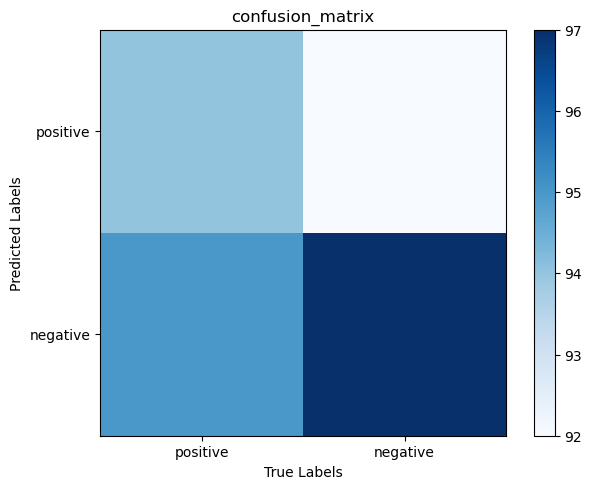

In [74]:
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('confusion_matrix')
plt.colorbar()
labels = ['positive', 'negative']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

In [75]:
# Check model Accuracy

accuracy = accuracy_score(test['Label'],prediction)
report = classification_report(test['Label'],prediction)
report


'              precision    recall  f1-score   support\n\n           0       0.50      0.51      0.50       186\n           1       0.51      0.51      0.51       192\n\n    accuracy                           0.51       378\n   macro avg       0.51      0.51      0.51       378\nweighted avg       0.51      0.51      0.51       378\n'